Starting state in binary, i.e. 1001: 10001


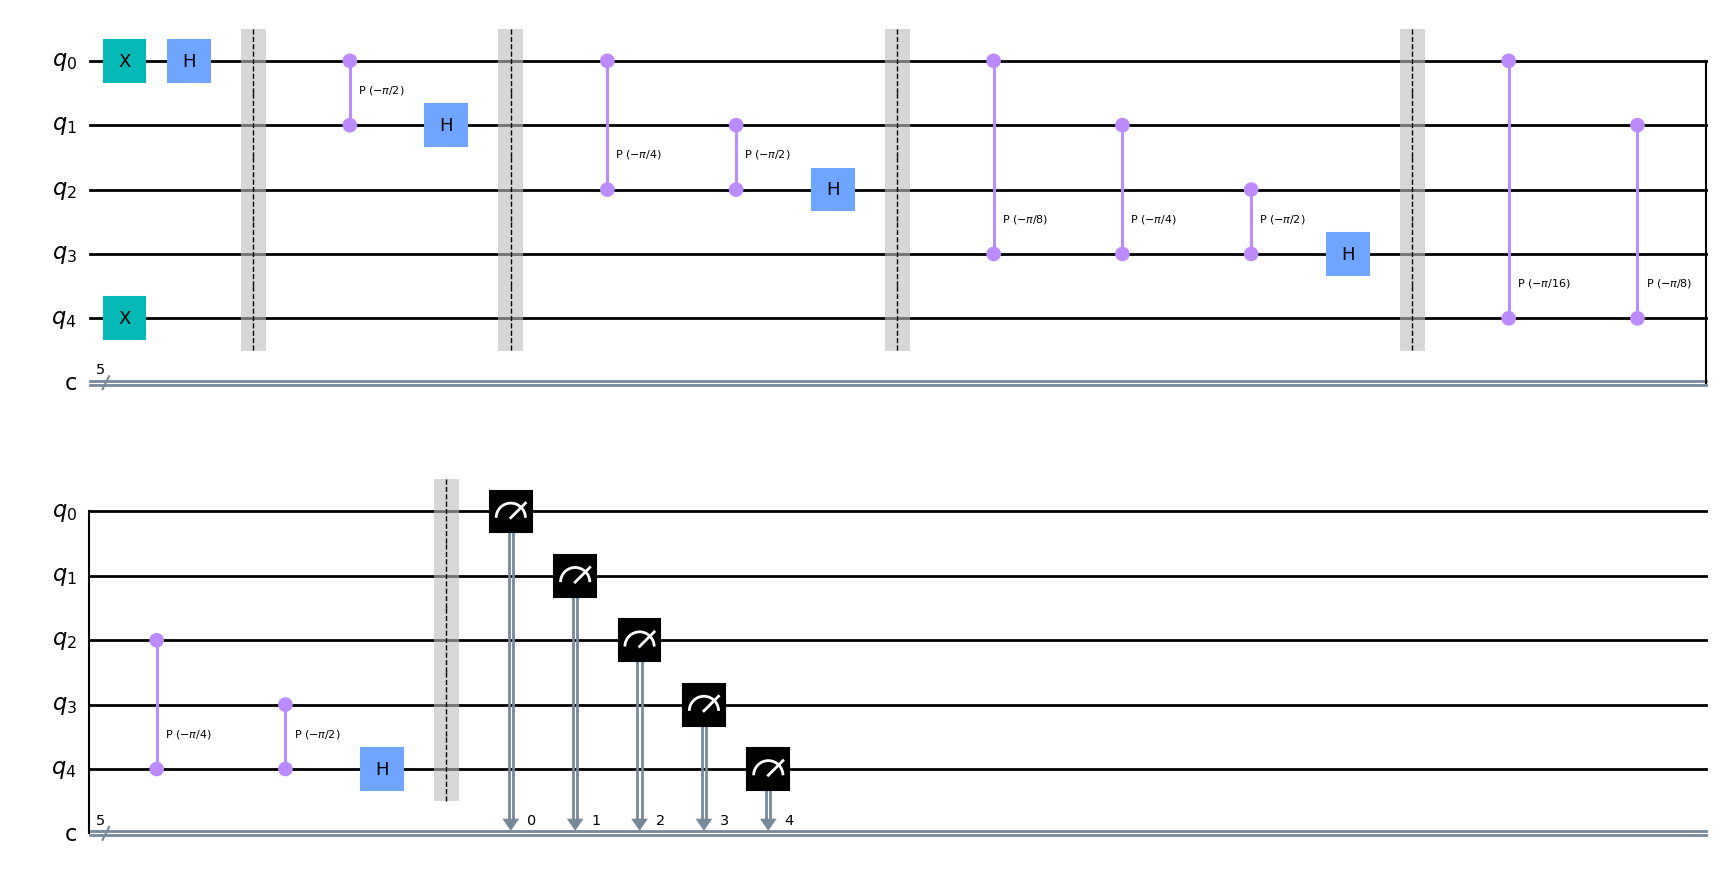

In [16]:
%matplotlib inline
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

start = input("Starting state in binary, i.e. 1001: ") 
n=len(start)
qc = QuantumCircuit(n, n)
for i in range(len(start)):
    if start[i]=='1':
        qc.x(i)
for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
        qc.barrier()

qc.measure(range(n), range(n))
qc.draw(output='mpl')


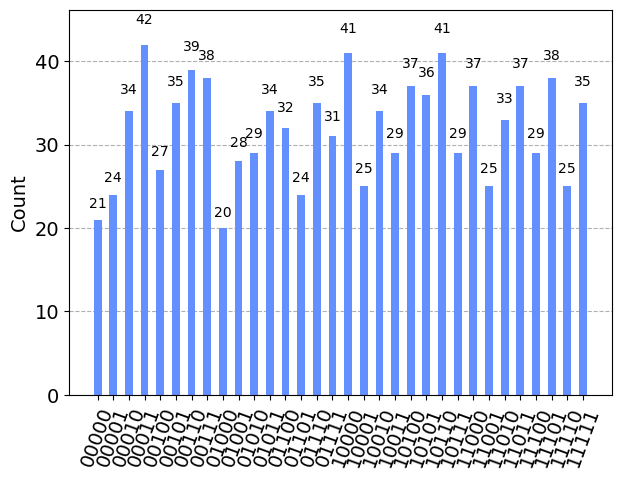

In [17]:
# Simulate the circuit and get the counts
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

Starting state in binary, i.e. 1001: 1111


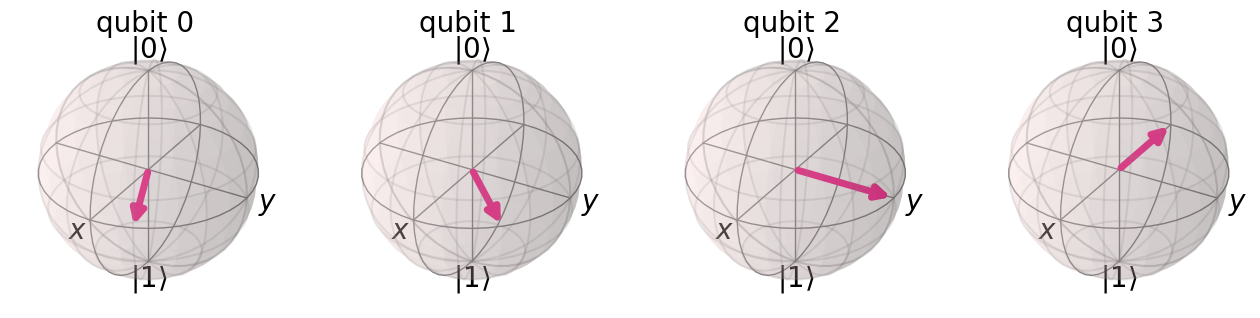

In [25]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

#Visualize what QFT does 
start = input("Starting state in binary, i.e. 1001: ") 
n=len(start)
qc = QuantumCircuit(n, n)
for i in range(len(start)):
    if start[i]=='1':
        qc.x(i)
for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
        qc.barrier()

state = Statevector(qc)
plot_bloch_multivector(state)